In [5]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from blacksholes.model import BlackSholesModel

In [6]:
import datetime as dt
from dateutil.relativedelta import relativedelta
import numpy as np
import pandas as pd
import pandas_datareader.data as web
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 10]

In [7]:
end = dt.datetime.today()
start = end - relativedelta(years=1)

df = web.DataReader('BARC.L', 'yahoo', start, end)
df = df.sort_values(by="Date")

In [8]:
df['previous_close'] = df.Close.shift(1)
df['returns'] = ((df.Close - df.previous_close)/df.previous_close)

In [9]:
df

,High,Low,Open,Close,Volume,Adj Close,previous_close,returns
Date,,,,,,,,
2021-05-18,182.399994,178.339996,181.660004,180.259995,33884356.0,174.296005,NaN,NaN
2021-05-19,180.990005,175.259995,177.779999,178.080002,32876459.0,172.188141,180.259995,-0.012094
2021-05-20,181.000000,177.419998,180.740005,178.880005,28753461.0,172.961670,178.080002,0.004492
2021-05-21,180.000000,176.740005,178.880005,179.020004,32681504.0,173.097046,178.880005,0.000783
2021-05-24,180.979996,178.160004,180.100006,179.679993,18683315.0,173.735199,179.020004,0.003687
...,...,...,...,...,...,...,...,...
2022-05-11,148.259995,143.720001,144.500000,147.300003,120851388.0,147.300003,143.639999,0.025480
2022-05-12,147.199997,142.199997,142.660004,145.940002,40307444.0,145.940002,147.300003,-0.009233
2022-05-13,150.544998,147.000000,147.559998,150.360001,40300228.0,150.360001,145.940002,0.030286


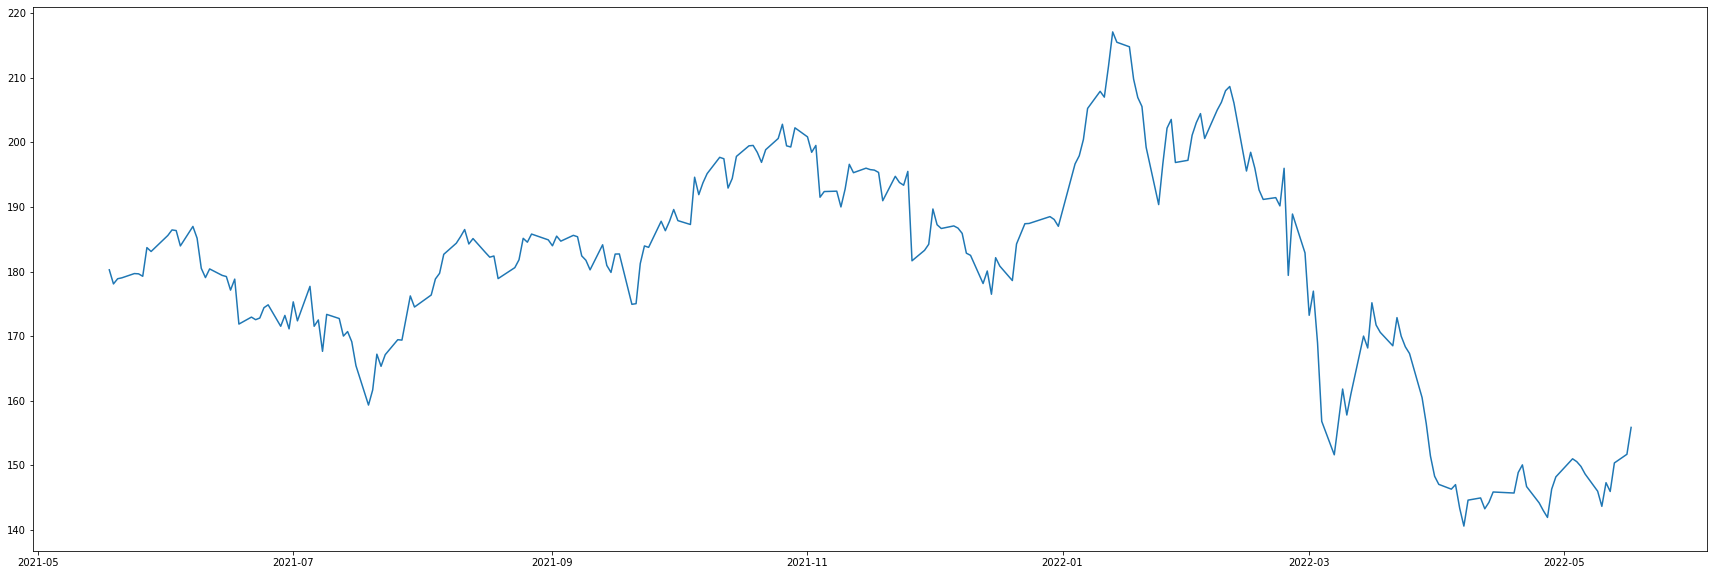

In [10]:
plt.plot(df.Close)

In [11]:
sigma = np.sqrt(504) * df['returns'].std()
# https://www.wallstreetmojo.com/volatility-formula/

In [12]:
risk_free_rate = 0.01884
# 17th May
# https://www.marketwatch.com/investing/Bond/TMBMKGB-10Y?countryCode=BX

In [18]:
spot = df['Close'].iloc[-1]
strike = 150

In [19]:
expiry = end + relativedelta(years=1)
t = (expiry - dt.datetime.utcnow()).days / 365

In [20]:
model = BlackSholesModel(risk_free_rate, lcp, strike_price, t, sigma)


In [21]:
price, success = model.get_call_price(5)

if success:
    print('The Option Price is:', price)

The Option Price is: 32.00342
